(442, 10) (442,)
(4, 3, 20)
Coefficient of determination: 0.129578
Coefficient of determination: 0.252084
Coefficient of determination: 0.227912


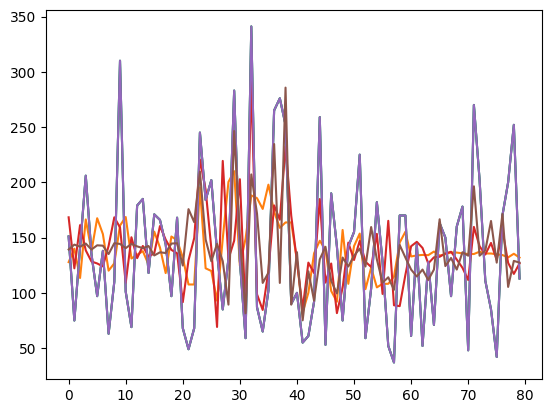

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape, y.shape)

indices = [0, 2, 3]
n_batches = 4

y_array = np.zeros(shape=(4, 3, 20), dtype=np.float32)
y_hat_array = np.zeros(shape=(4, 3, 20), dtype=np.float32)

for i, idx in enumerate(indices):
    for b in range(n_batches):
        X_train = X[b*20:(b+1)*20, idx:idx+1]
        y_train = y[b*20:(b+1)*20]
        y_array[b, i, :] = y_train

        # Create linear regression object
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        regr.fit(X_train, y_train)

        # Make predictions using the testing set
        y_hat = regr.predict(X_train)
        y_hat_array[b, i, :] = y_hat

        # # The mean squared error
        # print("Mean squared error: %.6f" % mean_squared_error(y_train, y_hat))
        # # The coefficient of determination: 1 is perfect prediction
        # print("Coefficient of determination: %.6f" % r2_score(y_train, y_hat))

print(y_array.shape)


for idx in range(3):
    y_all = y_array[:, idx, :].flatten()
    y_hat_all = y_hat_array[:, idx, :].flatten()
    plt.plot(y_all)
    plt.plot(y_hat_all)
    print("Coefficient of determination: %.6f" % r2_score(y_all, y_hat_all))

In [2]:
import torch
from torchmetrics.regression import R2Score

y_tensor = torch.from_numpy(y_array)
y_hat_tensor = torch.from_numpy(y_hat_array)

r2score = R2Score(num_outputs=3, multioutput='raw_values')

for b in range(n_batches):
    y_transpose =  y_tensor[b, :, :].transpose(0, 1)
    y_hat_transpose =y_hat_tensor[b, :, :].transpose(0, 1)
    
    r2score.update( y_hat_transpose, y_transpose )

print(r2score.compute())

tensor([0.1296, 0.2521, 0.2279])
